In [17]:
import astropy
from astropy.wcs import WCS
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import matplotlib.patches as patches

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

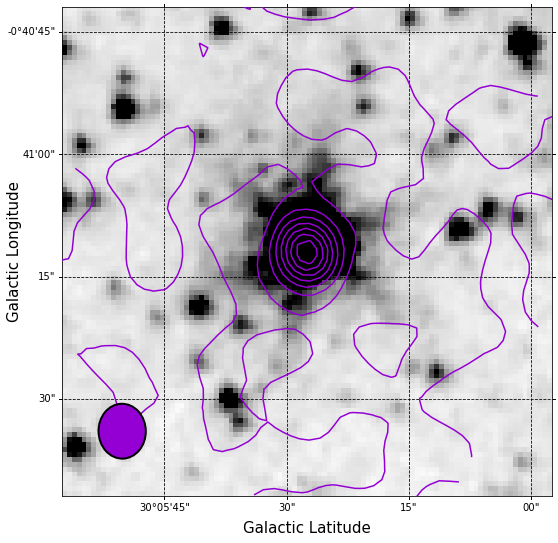

In [18]:
IRimg = fits.open('MaserSpitzer.fits')[0]
wcsIR = WCS(IRimg.header)
IR = IRimg.data

radio2 = fits.open('Maser_MKT.fits')[0]
wcsRad2 = WCS(radio2.header)
rad2 = radio2.data

pos2 = SkyCoord(ra =  282.1749*u.deg, dec = -2.8414162*u.deg, frame='icrs')
size= u.Quantity((60,60),u.arcsec)    

plt.figure(figsize=(9,9))

IRCut = Cutout2D(IR, position=pos2, size=size, wcs=wcsIR)
radCut2 = Cutout2D(rad2, position=pos2, size=size, wcs=wcsRad2.celestial)

ax = plt.subplot(projection=IRCut.wcs)

im = ax.imshow(IRCut.data,vmin=1, vmax=20,cmap='gray_r')
im = ax.contour(radCut2.data*1000, colors='darkviolet', transform=ax.get_transform(radCut2.wcs))
#ax.imshow(radCut2.data*1000,cmap='magma')
#plt.colorbar(im)

beam = [radio2.header['BMAJ'], radio2.header['BMIN'], radio2.header['BPA']]
point = ((pos2.ra+30*u.arcsec).deg, (pos2.dec+10*u.arcsec).deg)
psf = patches.Ellipse(xy =point, width=beam[0], height=beam[1], angle= beam[2],
                      transform=ax.get_transform('icrs'), color='darkviolet', ec='black', lw=2, zorder=2)
                   

    
ax.add_patch(psf) 
ax.coords.grid(True, color='black', ls='dashed')

plt.xlabel("Galactic Latitude", fontsize=15)
plt.ylabel("Galactic Longitude", fontsize=15, labelpad=-0.5)
#plt.savefig('MaserOverlay.pdf', bbox_inches = 'tight')
plt.show()

## 